In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools as it

plt.rc('axes', axisbelow=True)

%matplotlib inline

In [2]:
all_state_names = {'ak': 'Alaska', 'al': 'Alabama', 'ar': 'Arkansas',
                   'as': 'American Samoa',  'az': 'Arizona',
                   'ca': 'California', 'co': 'Colorado',
                   'ct': 'Connecticut', 'dc': 'District of Columbia',
                   'de': 'Delaware', 'fl': 'Florida', 'ga': 'Georgia',
                   'gu': 'Guam', 'hi': 'Hawaii', 'ia': 'Iowa',
                   'id': 'Idaho', 'il': 'Illinois', 'in': 'Indiana',
                   'ks': 'Kansas', 'ky': 'Kentucky', 'la': 'Louisiana',
                   'ma': 'Massachusetts', 'md': 'Maryland', 'me': 'Maine',
                   'mi': 'Michigan', 'mn': 'Minnesota', 'mo': 'Missouri',
                   'mp': 'Northern Mariana Islands', 'ms': 'Mississippi',
                   'mt': 'Montana', 'nc': 'North Carolina',
                   'nd': 'North Dakota', 'ne': 'Nebraska',
                   'nh': 'New Hampshire', 'nj': 'New Jersey',
                   'nm': 'New Mexico', 'nv': 'Nevada', 'ny': 'New York',
                   'oh': 'Ohio', 'ok': 'Oklahoma', 'or': 'Oregon',
                   'pa': 'Pennsylvania', 'pr': 'Puerto Rico',
                   'ri': 'Rhode Island', 'sc': 'South Carolina',
                   'sd': 'South Dakota', 'tn': 'Tennessee', 'tx': 'Texas',
                   'ut': 'Utah', 'va': 'Virginia',
                   'vi': 'Virgin Islands', 'vt': 'Vermont',
                   'wa': 'Washington', 'wi': 'Wisconsin',
                   'wv': 'West Virginia', 'wy': 'Wyoming'}

all_state_ids = {'01': 'al', '02': 'ak', '04': 'az', '05': 'ar',
                 '06': 'ca', '08': 'co', '09': 'ct', '10': 'de',
                 '11': 'dc', '12': 'fl', '13': 'ga', '15': 'hi',
                 '16': 'id', '17': 'il', '18': 'in', '19': 'ia',
                 '20': 'ks', '21': 'ky', '22': 'la', '23': 'me',
                 '24': 'md', '25': 'ma', '26': 'mi', '27': 'mn',
                 '28': 'ms', '29': 'mo', '30': 'mt', '31': 'ne',
                 '32': 'nv', '33': 'nh', '34': 'nj', '35': 'nm',
                 '36': 'ny', '37': 'nc', '38': 'nd', '39': 'oh',
                 '40': 'ok', '41': 'or', '42': 'pa', '44': 'ri',
                 '45': 'sc', '46': 'sd', '47': 'tn', '48': 'tx',
                 '49': 'ut', '50': 'vt', '51': 'va', '53': 'wa',
                 '54': 'wv', '55': 'wi', '56': 'wy', "60": 'as',
                 "66": 'gu', "72": 'pr', '78': 'vi', '69': 'mp'}

all_ids_state = {j:i for i,j in all_state_ids.items()}

state_posx = {'ak': (0, 0), 'me': (0, 10),'gu': (7, 0), 'vi': (7, 9), 'pr': (7, 8), 'mp': (7, 1),
              'vt': (1, 9), 'nh': (1, 10),'wa': (2, 0), 'id': (2, 1), 'mt': (2, 2), 'nd': (2, 3), 'mn': (2, 4),
              'il': (2, 5), 'wi': (2, 6), 'mi': (2, 7), 'ny': (2, 8), 'ri': (2, 9), 'ma': (2, 10),'or': (3, 0),
              'nv': (3, 1), 'wy': (3, 2), 'sd': (3, 3), 'ia': (3, 4), 'in': (3, 5), 'oh': (3, 6), 'pa': (3, 7),
              'nj': (3, 8), 'ct': (3, 9), 'ca': (4, 0), 'ut': (4, 1), 'co': (4, 2), 'ne': (4, 3), 'mo': (4, 4),
              'ky': (4, 5), 'wv': (4, 6), 'va': (4, 7), 'md': (4, 8), 'de': (4, 9), 'az': (5, 1), 'nm': (5, 2), 
              'ks': (5, 3), 'ar': (5, 4), 'tn': (5, 5), 'nc': (5, 6), 'sc': (5, 7), 'dc': (5, 8), 'ok': (6, 3),
              'la': (6, 4), 'ms': (6, 5), 'al': (6, 6), 'ga': (6, 7), 'hi': (6, 0), 'tx': (7, 3), 'fl': (7, 7)}

month_dict = {'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June',
              '07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'}

In [3]:
ll = pd.read_csv('cases-usa.csv', delimiter=',', dtype={'fips':str, 'cases':int, 'deaths':int})
ll = ll.sort_values(['date','state'])
ll = ll.dropna().reset_index().iloc[:,1:]

states = ll.state.unique().tolist()
dates = ll.date.unique().tolist()
date_dict = dict(zip(dates, list(range(len(dates)))))

ld = ll.date.unique().tolist()[-1]
fd = ll.date.unique().tolist()[0]
ld = month_dict[ld[5:7]]+" "+ld[-2:]+", "+ld[:4]
fd = month_dict[fd[5:7]]+" "+fd[-2:]+", "+fd[:4]
ll.tail()

,date,state,fips,cases,deaths
6334,2020-06-25,Virginia,51,59946,1675
6335,2020-06-25,Washington,53,31998,1301
6336,2020-06-25,West Virginia,54,2694,92
6337,2020-06-25,Wisconsin,55,26431,768
6338,2020-06-25,Wyoming,56,1326,20


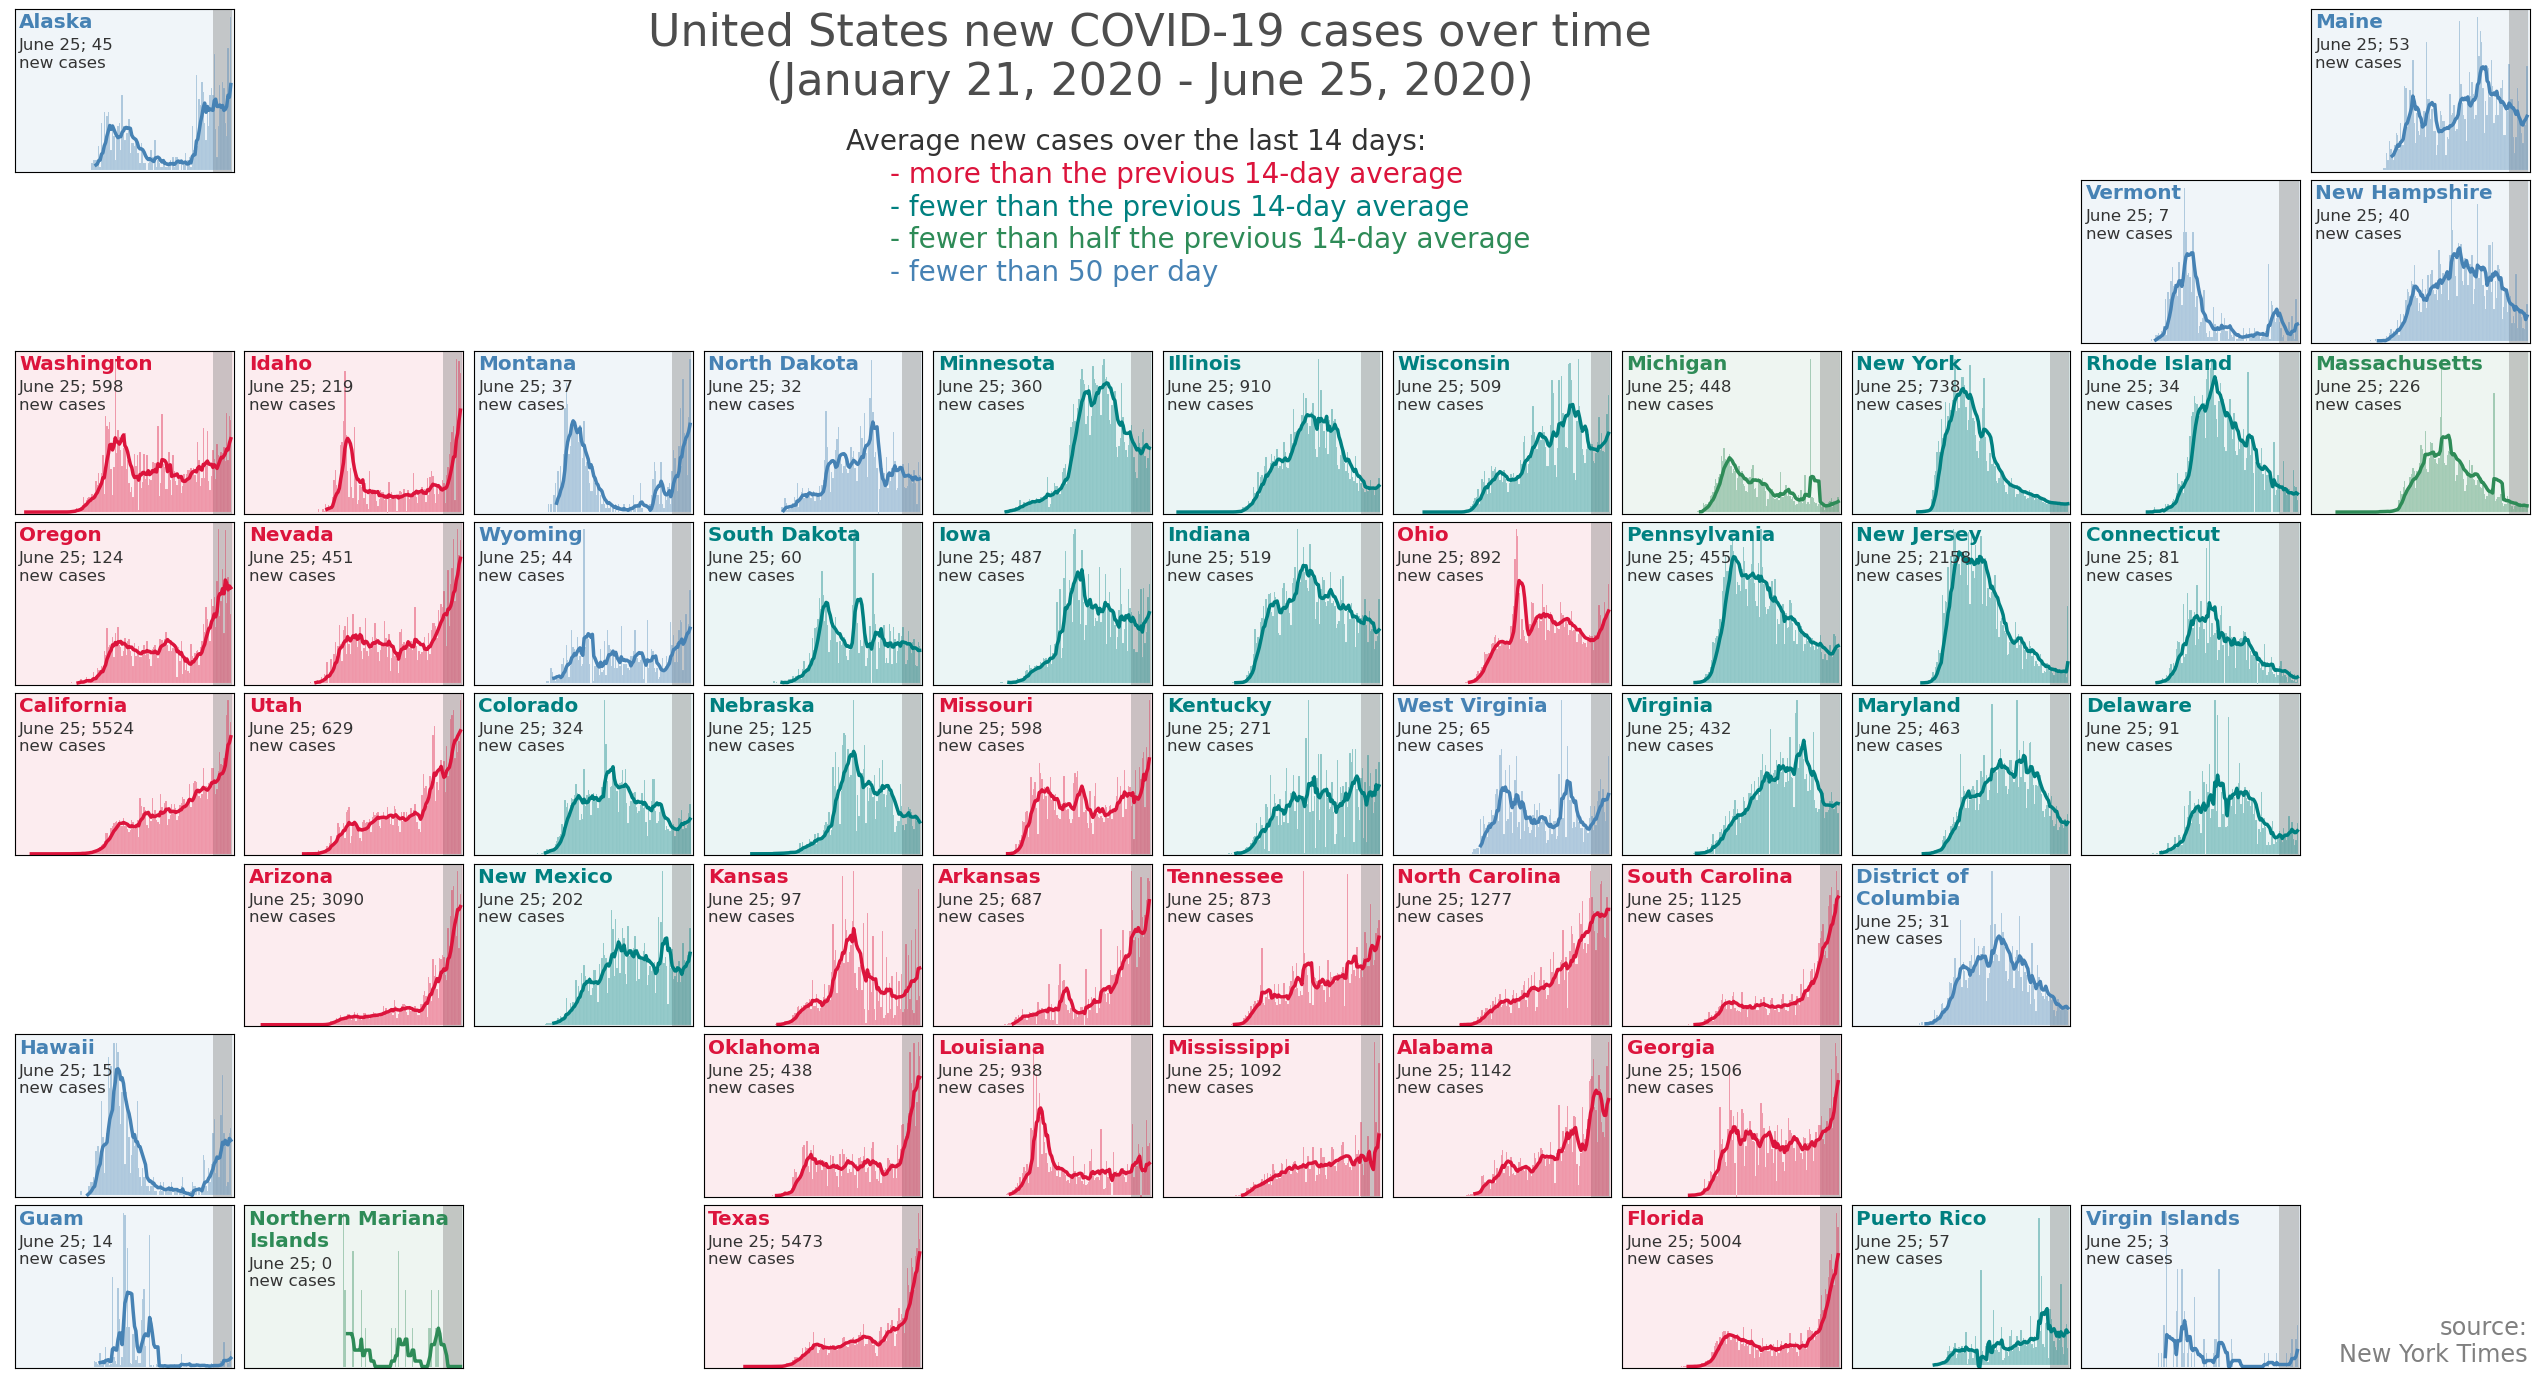

In [4]:
days_since = 14
min_c = 50

date_dict = dict(zip(dates, list(range(len(dates)))))
w = 2.95
h = 2.25
ncols = 11
nrows = 8
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=100, sharex=True)
plt.subplots_adjust(wspace=0.05,hspace=0.05)

for st, po in state_posx.items():
    stlab = all_state_names[st]
    ll_st = ll.loc[ll['state']==stlab]
    ll_st = ll_st.groupby(['date','state']).agg({'cases':'sum','deaths':'sum'}).reset_index()
    xvals_st = [date_dict[i] for i in sorted(ll_st['date'].tolist())]
    yvals_st = ll_st['cases'].diff().rolling(window=7).mean().tolist()
    
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= np.mean(yvals_st[(-days_since):]):
        col_co = 'teal'
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) <= np.mean(yvals_st[(-days_since):]):
        col_co = 'crimson'
    if np.mean(yvals_st[(-days_since):])<min_c:
        col_co = 'steelblue'
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= 2*np.mean(yvals_st[(-days_since):]):
        col_co = 'seagreen'

    if stlab == 'Rhode Island':
        col_co = 'teal'
    
    ax[po].plot(xvals_st, yvals_st, color=col_co, linewidth=2.5)
    ax[po].bar(xvals_st, ll_st['cases'].diff(), color=col_co, alpha=0.4, width=1, linewidth=0.1, ec='w')

    if stlab == 'District of Columbia':
        stlab = 'District of\nColumbia'
    if stlab == 'Northern Mariana Islands':
        stlab = 'Northern Mariana\nIslands'

    ax[po].text(0.02,0.98,stlab,fontsize='x-large',va='top',ha='left',
                color=col_co,fontweight='bold',transform=ax[po].transAxes)

    casey = 0.69
    if '\n' not in stlab:
        casey=0.825
    ax[po].text(0.02,casey,'%s; %i\nnew cases'%(ld[:-6], ll_st['cases'].diff().tolist()[-1]),
                fontsize='large',va='top',ha='left', color='.2',transform=ax[po].transAxes)

    ylim_st = ax[po].get_ylim()
    xlim_st = ax[po].get_xlim()
    ydiff = ylim_st[1]-ylim_st[0]
    ax[po].set_ylim(0-ydiff*0.01, ylim_st[1])
    ax[po].set_xlim(-1,xvals_st[-1]+2)
    ax[po].fill_between([-1,xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color=col_co,alpha=0.08,zorder=0)
    ax[po].fill_between([xvals_st[-days_since],xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color='.5',alpha=0.4,zorder=0, linewidth=0)

for tup in tups:
    if tup not in state_posx.values():
        ax[tup].set_axis_off()
    else:
        ax[tup].set_xticks([])
        ax[tup].set_yticks([])

ax[tups[-1]].text(0.99,0.01,'source:\nNew York Times',color='.5',fontsize='xx-large',
                va='bottom', ha='right', transform=ax[tups[-1]].transAxes)
ax[(0,4)].text(0.99,0.99,'United States new COVID-19 cases over time\n(%s - %s)'%(fd,ld),
               color='.3', fontsize=32, va='top', ha='center', transform=ax[(0,4)].transAxes)

ax[(1,3)].text(0.65,1.15,'Average new cases over the last %i days:'%(days_since),
                color='.2',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.95,'- more than the previous %i-day average'%(days_since),
                color='crimson',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.75,'- fewer than the previous %i-day average'%(days_since),
                color='teal',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.55,'- fewer than half the previous %i-day average'%(days_since),
                color='seagreen',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.35,'- fewer than %i per day'%(min_c),
                color='steelblue',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)

plt.savefig('state_subplot_casecounts_trends.png', dpi=425, bbox_inches='tight')

plt.show()

# Dark theme

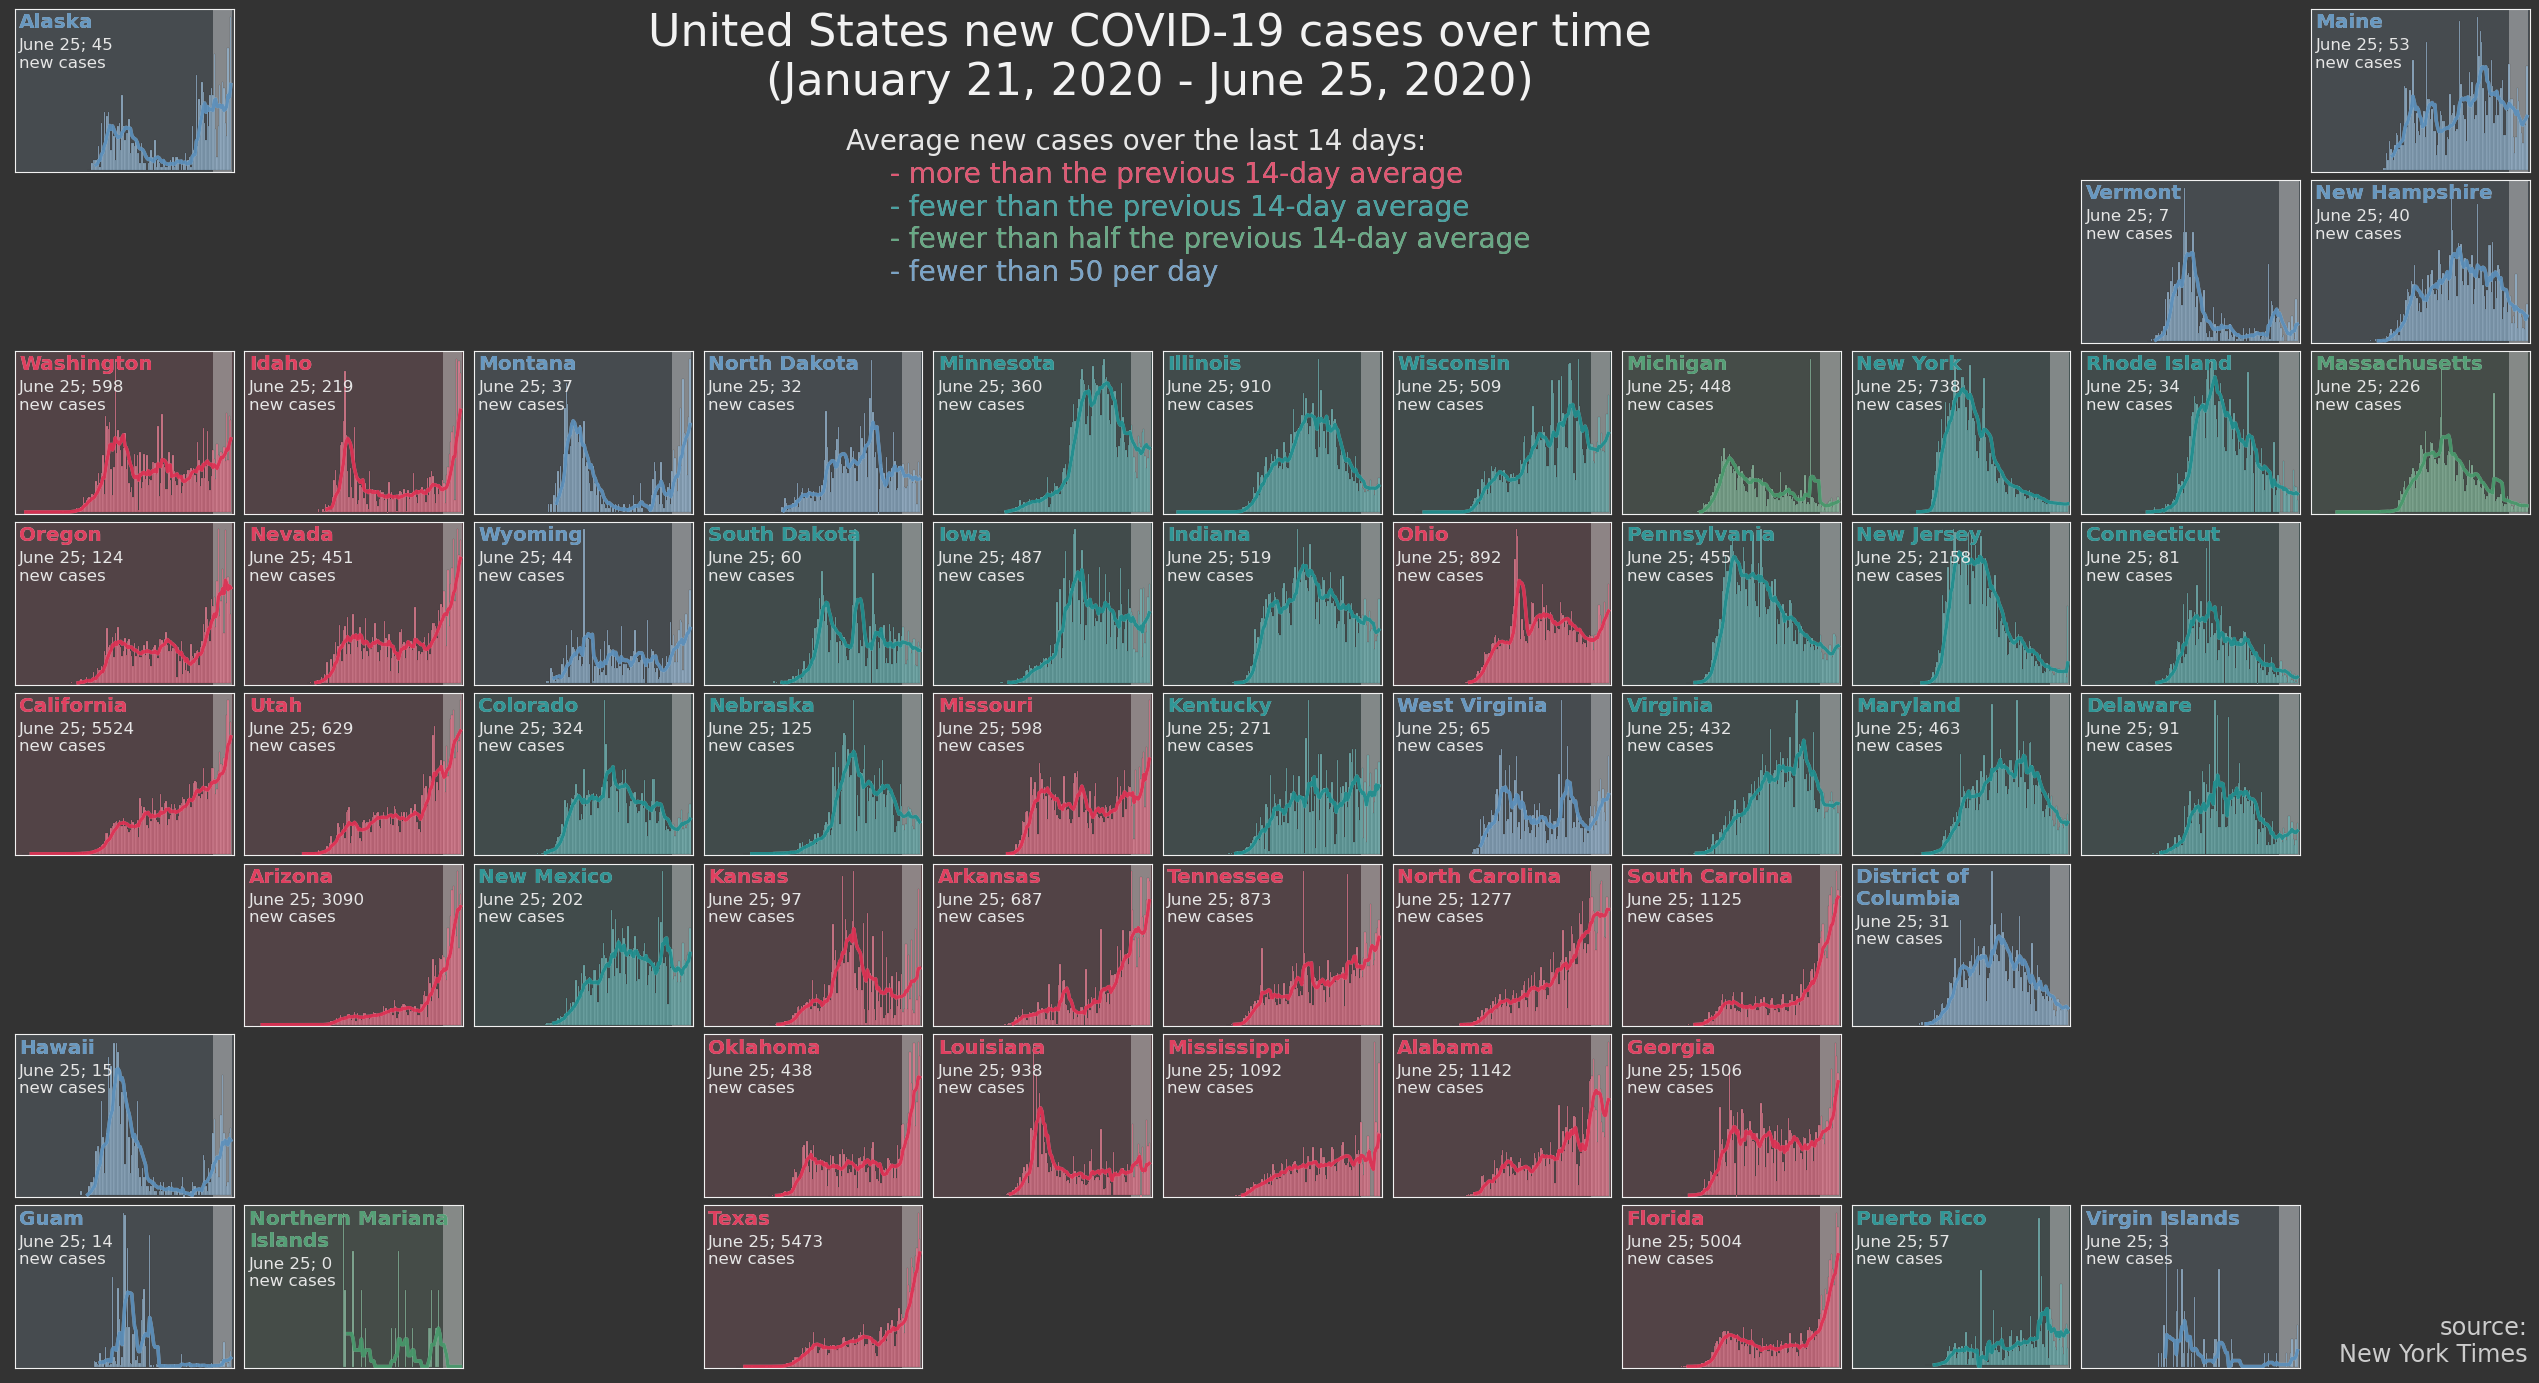

In [5]:
days_since = 14
min_c = 50

w = 2.95
h = 2.25
ncols = 11
nrows = 8
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), dpi=100, sharex=True, facecolor='.2')
plt.subplots_adjust(wspace=0.05,hspace=0.05)

for st, po in state_posx.items():
    stlab = all_state_names[st]
    ll_st = ll.loc[ll['state']==stlab]
    ll_st = ll_st.groupby(['date','state']).agg({'cases':'sum','deaths':'sum'}).reset_index()
    xvals_st = [date_dict[i] for i in sorted(ll_st['date'].tolist())]
    yvals_st = ll_st['cases'].diff().rolling(window=7).mean().tolist()
    
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= np.mean(yvals_st[(-days_since):]):
        col_co = 'teal'
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) <= np.mean(yvals_st[(-days_since):]):
        col_co = 'crimson'
    if np.mean(yvals_st[(-days_since):])<min_c:
        col_co = 'steelblue'
    if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= 2*np.mean(yvals_st[(-days_since):]):
        col_co = 'seagreen'

    if stlab == 'Rhode Island':
        col_co = 'teal'
    
    ax[po].plot(xvals_st, yvals_st, color='.95', linewidth=2.5,alpha=0.6)
    ax[po].plot(xvals_st, yvals_st, color=col_co, linewidth=2.5, alpha=0.8)
    ax[po].bar(xvals_st, ll_st['cases'].diff(), color='.95', alpha=0.7, width=1, lw=0.2, ec='.2')
    ax[po].bar(xvals_st, ll_st['cases'].diff(), color=col_co, alpha=0.4, width=1)

    if stlab == 'District of Columbia':
        stlab = 'District of\nColumbia'
    if stlab == 'Northern Mariana Islands':
        stlab = 'Northern Mariana\nIslands'

    ax[po].text(0.02,0.98,stlab,fontsize='x-large',va='top',ha='left',
                color='.95',fontweight='bold',transform=ax[po].transAxes)
    ax[po].text(0.02,0.98,stlab,fontsize='x-large',va='top',ha='left',alpha=0.8,
                color=col_co,fontweight='bold',transform=ax[po].transAxes)

    casey = 0.69
    if '\n' not in stlab:
        casey=0.825
    ax[po].text(0.02,casey,'%s; %i\nnew cases'%(ld[:-6], ll_st['cases'].diff().tolist()[-1]),
                fontsize='large',va='top',ha='left', color='.9',transform=ax[po].transAxes)

    ylim_st = ax[po].get_ylim()
    xlim_st = ax[po].get_xlim()
    ydiff = ylim_st[1]-ylim_st[0]
    ax[po].set_ylim(0-ydiff*0.01, ylim_st[1])
    ax[po].set_xlim(-1,xvals_st[-1]+2)
    ax[po].fill_between([-1,xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color=col_co,alpha=0.08,zorder=0)
    ax[po].fill_between([xvals_st[-days_since],xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color='.9',alpha=0.4,zorder=0, linewidth=0)

for tup in tups:
    if tup not in state_posx.values():
        ax[tup].set_axis_off()
    else:
        ax[tup].set_xticks([])
        ax[tup].set_yticks([])
        ax[tup].patch.set_alpha(0.1)
        ax[tup].spines['bottom'].set_color('.95')
        ax[tup].spines['top'].set_color('.95')
        ax[tup].spines['right'].set_color('.95')
        ax[tup].spines['left'].set_color('.95')

ax[tups[-1]].text(0.99,0.01,'source:\nNew York Times',color='.8',fontsize='xx-large',
                va='bottom', ha='right', transform=ax[tups[-1]].transAxes)
ax[(0,4)].text(0.99,0.99,'United States new COVID-19 cases over time\n(%s - %s)'%(fd,ld),
               color='.95', fontsize=32, va='top', ha='center', transform=ax[(0,4)].transAxes)

ax[(1,3)].text(0.65,1.15,'Average new cases over the last %i days:'%(days_since),
                color='.9',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.95,'- more than the previous %i-day average'%(days_since),
                color='.95',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.75,'- fewer than the previous %i-day average'%(days_since),
                color='.95',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.55,'- fewer than half the previous %i-day average'%(days_since),
                color='.95',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.35,'- fewer than %i per day'%(min_c),
                color='.95',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.95,'- more than the previous %i-day average'%(days_since), alpha=0.7,
                color='crimson',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.75,'- fewer than the previous %i-day average'%(days_since), alpha=0.7,
                color='teal',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.55,'- fewer than half the previous %i-day average'%(days_since), alpha=0.7,
                color='seagreen',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)
ax[(1,3)].text(0.85,0.35,'- fewer than %i per day'%(min_c), alpha=0.7,
                color='steelblue',fontsize=20, va='bottom', ha='left', transform=ax[(1,3)].transAxes)


plt.savefig('state_subplot_casecounts_trends_dark.png', dpi=425, bbox_inches='tight', facecolor='.2')

plt.show()

# Worldwide

In [6]:
country_data = {'Afghanistan': {'region': 'Asia', 'coordinates': (7, 21)},
     'Albania': {'region': 'Europe', 'coordinates': (8, 14)},
     'Algeria': {'region': 'Africa', 'coordinates': (10, 12)},
     'Andorra': {'region': 'Europe', 'coordinates': (5, 11)},
     'Angola': {'region': 'Africa', 'coordinates': (16, 12)},
     'Antigua and Barbuda': {'region': 'Americas', 'coordinates': (3, 6)},
     'Argentina': {'region': 'Americas', 'coordinates': (13, 5)},
     'Armenia': {'region': 'Asia', 'coordinates': (5, 19)},
     'Australia': {'region': 'Oceania', 'coordinates': (17, 22)},
     'Austria': {'region': 'Europe', 'coordinates': (5, 14)},
     'Azerbaijan': {'region': 'Asia', 'coordinates': (6, 20)},
     'Bahamas': {'region': 'Americas', 'coordinates': (1, 3)},
     'Bahrain': {'region': 'Asia', 'coordinates': (8, 19)},
     'Bangladesh': {'region': 'Asia', 'coordinates': (7, 22)},
     'Barbados': {'region': 'Americas', 'coordinates': (5, 7)},
     'Belarus': {'region': 'Europe', 'coordinates': (3, 16)},
     'Belgium': {'region': 'Europe', 'coordinates': (4, 12)},
     'Belize': {'region': 'Americas', 'coordinates': (2, 1)},
     'Benin': {'region': 'Africa', 'coordinates': (13, 14)},
     'Bhutan': {'region': 'Asia', 'coordinates': (7, 23)},
     'Bolivia': {'region': 'Americas', 'coordinates': (10, 5)},
     'Bosnia and Herzegovina': {'region': 'Europe', 'coordinates': (6, 14)},
     'Botswana': {'region': 'Africa', 'coordinates': (17, 14)},
     'Brazil': {'region': 'Americas', 'coordinates': (10, 7)},
     'Brunei': {'region': 'Asia', 'coordinates': (11, 24)},
     'Bulgaria': {'region': 'Europe', 'coordinates': (6, 16)},
     'Burkina Faso': {'region': 'Africa', 'coordinates': (12, 12)},
     'Burundi': {'region': 'Africa', 'coordinates': (15, 14)},
     'Cambodia': {'region': 'Asia', 'coordinates': (9, 24)},
     'Cameroon': {'region': 'Africa', 'coordinates': (14, 13)},
     'Canada': {'region': 'Americas', 'coordinates': (0, 0)},
     'Cabo Verde': {'region': 'Africa', 'coordinates': (14, 9)},
     'Central African Republic': {'region': 'Africa', 'coordinates': (13, 15)},
     'Chad': {'region': 'Africa', 'coordinates': (12, 13)},
     'Chile': {'region': 'Americas', 'coordinates': (12, 5)},
     'China': {'region': 'Asia', 'coordinates': (5, 23)},
     'Colombia': {'region': 'Americas', 'coordinates': (8, 4)},
     'Comoros': {'region': 'Africa', 'coordinates': (17, 17)},
     'Congo': {'region': 'Africa', 'coordinates': (15, 13)},
     'Democratic Republic of Congo': {'region': 'Africa', 'coordinates': (14, 14)},
     'Costa Rica': {'region': 'Americas', 'coordinates': (6, 2)},
     "Cote d'Ivoire": {'region': 'Africa', 'coordinates': (14, 11)},
     'Croatia': {'region': 'Europe', 'coordinates': (7, 13)},
     'Cuba': {'region': 'Americas', 'coordinates': (2, 3)},
     'Cyprus': {'region': 'Asia', 'coordinates': (9, 15)},
     'Czechia': {'region': 'Europe', 'coordinates': (4, 14)},
     'Denmark': {'region': 'Europe', 'coordinates': (2, 13)},
     'Djibouti': {'region': 'Africa', 'coordinates': (12, 16)},
     'Dominica': {'region': 'Americas', 'coordinates': (6, 6)},
     'Dominican Republic': {'region': 'Americas', 'coordinates': (3, 5)},
     'Ecuador': {'region': 'Americas', 'coordinates': (9, 4)},
     'Egypt': {'region': 'Africa', 'coordinates': (10, 15)},
     'El Salvador': {'region': 'Americas', 'coordinates': (4, 0)},
     'Equatorial Guinea': {'region': 'Africa', 'coordinates': (15, 12)},
     'Eritrea': {'region': 'Africa', 'coordinates': (12, 15)},
     'Estonia': {'region': 'Europe', 'coordinates': (1, 16)},
     'Ethiopia': {'region': 'Africa', 'coordinates': (13, 16)},
     'Fiji': {'region': 'Oceania', 'coordinates': (17, 24)},
     'Finland': {'region': 'Europe', 'coordinates': (0, 16)},
     'France': {'region': 'Europe', 'coordinates': (4, 11)},
     'Gabon': {'region': 'Africa', 'coordinates': (16, 13)},
     'Gambia': {'region': 'Africa', 'coordinates': (11, 11)},
     'Georgia': {'region': 'Asia', 'coordinates': (5, 20)},
     'Germany': {'region': 'Europe', 'coordinates': (3, 13)},
     'Ghana': {'region': 'Africa', 'coordinates': (13, 12)},
     'Greece': {'region': 'Europe', 'coordinates': (8, 15)},
     'Greenland': {'region': 'Americas', 'coordinates': (0, 7)},
     'Grenada': {'region': 'Americas', 'coordinates': (7, 6)},
     'Guatemala': {'region': 'Americas', 'coordinates': (3, 0)},
     'Guinea': {'region': 'Africa', 'coordinates': (13, 10)},
     'Guinea-Bissau': {'region': 'Africa', 'coordinates': (12, 10)},
     'Guyana': {'region': 'Americas', 'coordinates': (9, 5)},
     'Haiti': {'region': 'Americas', 'coordinates': (3, 4)},
     'Honduras': {'region': 'Americas', 'coordinates': (4, 1)},
     'Hungary': {'region': 'Europe', 'coordinates': (5, 15)},
     'Iceland': {'region': 'Europe', 'coordinates': (0, 9)},
     'India': {'region': 'Asia', 'coordinates': (8, 21)},
     'Indonesia': {'region': 'Asia', 'coordinates': (12, 24)},
     'Iran': {'region': 'Asia', 'coordinates': (7, 19)},
     'Iraq': {'region': 'Asia', 'coordinates': (6, 19)},
     'Ireland': {'region': 'Europe', 'coordinates': (3, 9)},
     'Israel': {'region': 'Asia', 'coordinates': (9, 17)},
     'Italy': {'region': 'Europe', 'coordinates': (6, 12)},
     'Jamaica': {'region': 'Americas', 'coordinates': (3, 3)},
     'Japan': {'region': 'Asia', 'coordinates': (5, 25)},
     'Jordan': {'region': 'Asia', 'coordinates': (7, 17)},
     'Kazakhstan': {'region': 'Asia', 'coordinates': (4, 23)},
     'Kenya': {'region': 'Africa', 'coordinates': (14, 16)},
     'Kiribati': {'region': 'Oceania', 'coordinates': (15, 25)},
     'North Korea': {'region': 'Asia', 'coordinates': (5, 24)},
     'South Korea': {'region': 'Asia', 'coordinates': (6, 24)},
     'Kosovo': {'region': 'Europe', 'coordinates': (7, 15)},
     'Kuwait': {'region': 'Asia', 'coordinates': (7, 18)},
     'Kyrgyzstan': {'region': 'Asia', 'coordinates': (5, 22)},
     'Laos': {'region': 'Asia', 'coordinates': (8, 24)},
     'Latvia': {'region': 'Europe', 'coordinates': (2, 16)},
     'Lebanon': {'region': 'Asia', 'coordinates': (8, 17)},
     'Lesotho': {'region': 'Africa', 'coordinates': (18, 16)},
     'Liberia': {'region': 'Africa', 'coordinates': (13, 11)},
     'Libya': {'region': 'Africa', 'coordinates': (10, 14)},
     'Liechtenstein': {'region': 'Europe', 'coordinates': (5, 13)},
     'Lithuania': {'region': 'Europe', 'coordinates': (3, 15)},
     'Luxembourg': {'region': 'Europe', 'coordinates': (5, 12)},
     'North Macedonia': {'region': 'Europe', 'coordinates': (7, 16)},
     'Madagascar': {'region': 'Africa', 'coordinates': (18, 18)},
     'Malawi': {'region': 'Africa', 'coordinates': (16, 14)},
     'Malaysia': {'region': 'Asia', 'coordinates': (10, 23)},
     'Maldives': {'region': 'Asia', 'coordinates': (11, 20)},
     'Mali': {'region': 'Africa', 'coordinates': (11, 13)},
     'Malta': {'region': 'Europe', 'coordinates': (9, 13)},
     'Marshall Islands': {'region': 'Oceania', 'coordinates': (14, 25)},
     'Mauritania': {'region': 'Africa', 'coordinates': (11, 10)},
     'Mauritius': {'region': 'Africa', 'coordinates': (19, 18)},
     'Mexico': {'region': 'Americas', 'coordinates': (2, 0)},
     'Micronesia': {'region': 'Oceania', 'coordinates': (14, 24)},
     'Moldova': {'region': 'Europe', 'coordinates': (4, 16)},
     'Mongolia': {'region': 'Asia', 'coordinates': (4, 24)},
     'Montenegro': {'region': 'Europe', 'coordinates': (7, 14)},
     'Morocco': {'region': 'Africa', 'coordinates': (10, 11)},
     'Mozambique': {'region': 'Africa', 'coordinates': (16, 15)},
     'Burma': {'region': 'Asia', 'coordinates': (8, 23)},
     'Namibia': {'region': 'Africa', 'coordinates': (18, 14)},
     'Nauru': {'region': 'Oceania', 'coordinates': (15, 24)},
     'Nepal': {'region': 'Asia', 'coordinates': (8, 22)},
     'Netherlands': {'region': 'Europe', 'coordinates': (3, 12)},
     'New Zealand': {'region': 'Oceania', 'coordinates': (18, 23)},
     'Nicaragua': {'region': 'Americas', 'coordinates': (5, 1)},
     'Niger': {'region': 'Africa', 'coordinates': (11, 14)},
     'Nigeria': {'region': 'Africa', 'coordinates': (14, 12)},
     'Norway': {'region': 'Europe', 'coordinates': (0, 14)},
     'Oman': {'region': 'Asia', 'coordinates': (10, 18)},
     'Pakistan': {'region': 'Asia', 'coordinates': (7, 20)},
     'Palau': {'region': 'Oceania', 'coordinates': (14, 23)},
     'Panama': {'region': 'Americas', 'coordinates': (7, 3)},
     'Papua New Guinea': {'region': 'Oceania', 'coordinates': (15, 23)},
     'Paraguay': {'region': 'Americas', 'coordinates': (11, 5)},
     'Peru': {'region': 'Americas', 'coordinates': (10, 4)},
     'Philippines': {'region': 'Asia', 'coordinates': (10, 25)},
     'Poland': {'region': 'Europe', 'coordinates': (3, 14)},
     'Portugal': {'region': 'Europe', 'coordinates': (6, 10)},
     'Qatar': {'region': 'Asia', 'coordinates': (9, 18)},
     'Romania': {'region': 'Europe', 'coordinates': (5, 16)},
     'Russia': {'region': 'Europe', 'coordinates': (3, 17)},
     'Rwanda': {'region': 'Africa', 'coordinates': (15, 15)},
     'Saint Kitts and Nevis': {'region': 'Americas', 'coordinates': (4, 5)},
     'Saint Lucia': {'region': 'Americas', 'coordinates': (4, 6)},
     'Saint Vincent and the Grenadines': {'region': 'Americas', 'coordinates': (5, 6)},
     'Samoa': {'region': 'Oceania', 'coordinates': (16, 25)},
     'Sao Tome and Principe': {'region': 'Africa', 'coordinates': (15, 10)},
     'Saudi Arabia': {'region': 'Asia', 'coordinates': (8, 18)},
     'Senegal': {'region': 'Africa', 'coordinates': (11, 12)},
     'Serbia': {'region': 'Europe', 'coordinates': (6, 15)},
     'Seychelles': {'region': 'Africa', 'coordinates': (16, 17)},
     'Sierra Leone': {'region': 'Africa', 'coordinates': (12, 11)},
     'Singapore': {'region': 'Asia', 'coordinates': (12, 23)},
     'Slovakia': {'region': 'Europe', 'coordinates': (4, 15)},
     'Slovenia': {'region': 'Europe', 'coordinates': (6, 13)},
     'Solomon Islands': {'region': 'Oceania', 'coordinates': (16, 23)},
     'Somalia': {'region': 'Africa', 'coordinates': (13, 17)},
     'South Africa': {'region': 'Africa', 'coordinates': (19, 15)},
     'South Sudan': {'region': 'Africa', 'coordinates': (12, 14)},
     'Spain': {'region': 'Europe', 'coordinates': (6, 11)},
     'Sri Lanka': {'region': 'Asia', 'coordinates': (10, 21)},
     'Sudan': {'region': 'Africa', 'coordinates': (11, 15)},
     'Suriname': {'region': 'Americas', 'coordinates': (10, 6)},
     'Eswatini': {'region': 'Africa', 'coordinates': (18, 15)},
     'Sweden': {'region': 'Europe', 'coordinates': (0, 15)},
     'Switzerland': {'region': 'Europe', 'coordinates': (4, 13)},
     'Syria': {'region': 'Asia', 'coordinates': (6, 18)},
     'Taiwan': {'region': 'Asia', 'coordinates': (6, 23)},
     'Tajikistan': {'region': 'Asia', 'coordinates': (6, 22)},
     'Tanzania': {'region': 'Africa', 'coordinates': (15, 16)},
     'Thailand': {'region': 'Asia', 'coordinates': (9, 23)},
     'Timor-Leste': {'region': 'Asia', 'coordinates': (13, 24)},
     'Togo': {'region': 'Africa', 'coordinates': (13, 13)},
     'Tonga': {'region': 'Oceania', 'coordinates': (17, 25)},
     'Trinidad and Tobago': {'region': 'Americas', 'coordinates': (8, 6)},
     'Tunisia': {'region': 'Africa', 'coordinates': (10, 13)},
     'Turkey': {'region': 'Asia', 'coordinates': (6, 17)},
     'Turkmenistan': {'region': 'Asia', 'coordinates': (6, 21)},
     'Tuvalu': {'region': 'Oceania', 'coordinates': (16, 24)},
     'Uganda': {'region': 'Africa', 'coordinates': (14, 15)},
     'Ukraine': {'region': 'Europe', 'coordinates': (4, 17)},
     'United Arab Emirates': {'region': 'Asia', 'coordinates': (9, 19)},
     'United Kingdom': {'region': 'Europe', 'coordinates': (3, 10)},
     'United States': {'region': 'Americas', 'coordinates': (1, 0)},
     'Uruguay': {'region': 'Americas', 'coordinates': (11, 6)},
     'Uzbekistan': {'region': 'Asia', 'coordinates': (5, 21)},
     'Vanuatu': {'region': 'Oceania', 'coordinates': (17, 23)},
     'Venezuela': {'region': 'Americas', 'coordinates': (8, 5)},
     'Vietnam': {'region': 'Asia', 'coordinates': (8, 25)},
     'West Bank and Gaza': {'region': 'Asia', 'coordinates': (9, 16)},
     'Western Sahara': {'region': 'Africa', 'coordinates': (10, 10)},
     'Yemen': {'region': 'Asia', 'coordinates': (10, 17)},
     'Zambia': {'region': 'Africa', 'coordinates': (17, 13)},
     'Zimbabwe': {'region': 'Africa', 'coordinates': (17, 15)}}

country_pos = {i:j['coordinates'] for i,j in country_data.items()}
country_regions = {i:j['region'] for i,j in country_data.items()}

In [7]:
# https://github.com/datasets/covid-19
wdf = pd.read_csv('cases-country.csv')
wdf.loc[wdf['country_name']=='US','country_name'] = 'United States'
wdf.loc[wdf['country_name']=='Korea, South','country_name'] = 'South Korea'
wdf.loc[wdf['country_name']=='Taiwan*','country_name'] = 'Taiwan'
wdf.loc[wdf['country_name']=='Congo (Brazzaville)','country_name'] = 'Congo'
wdf.loc[wdf['country_name']=='Congo (Kinshasa)','country_name'] = 'Democratic Republic of Congo'

co_dates = sorted(wdf.date.unique())
co_date_dict = dict(zip(co_dates, list(range(len(co_dates)))))
countries = sorted(wdf.country_name.unique())
print('excluding',[i for i in sorted(countries) if i not in list(country_pos.keys())])

excluding ['Diamond Princess', 'Holy See', 'MS Zaandam', 'Monaco', 'San Marino']


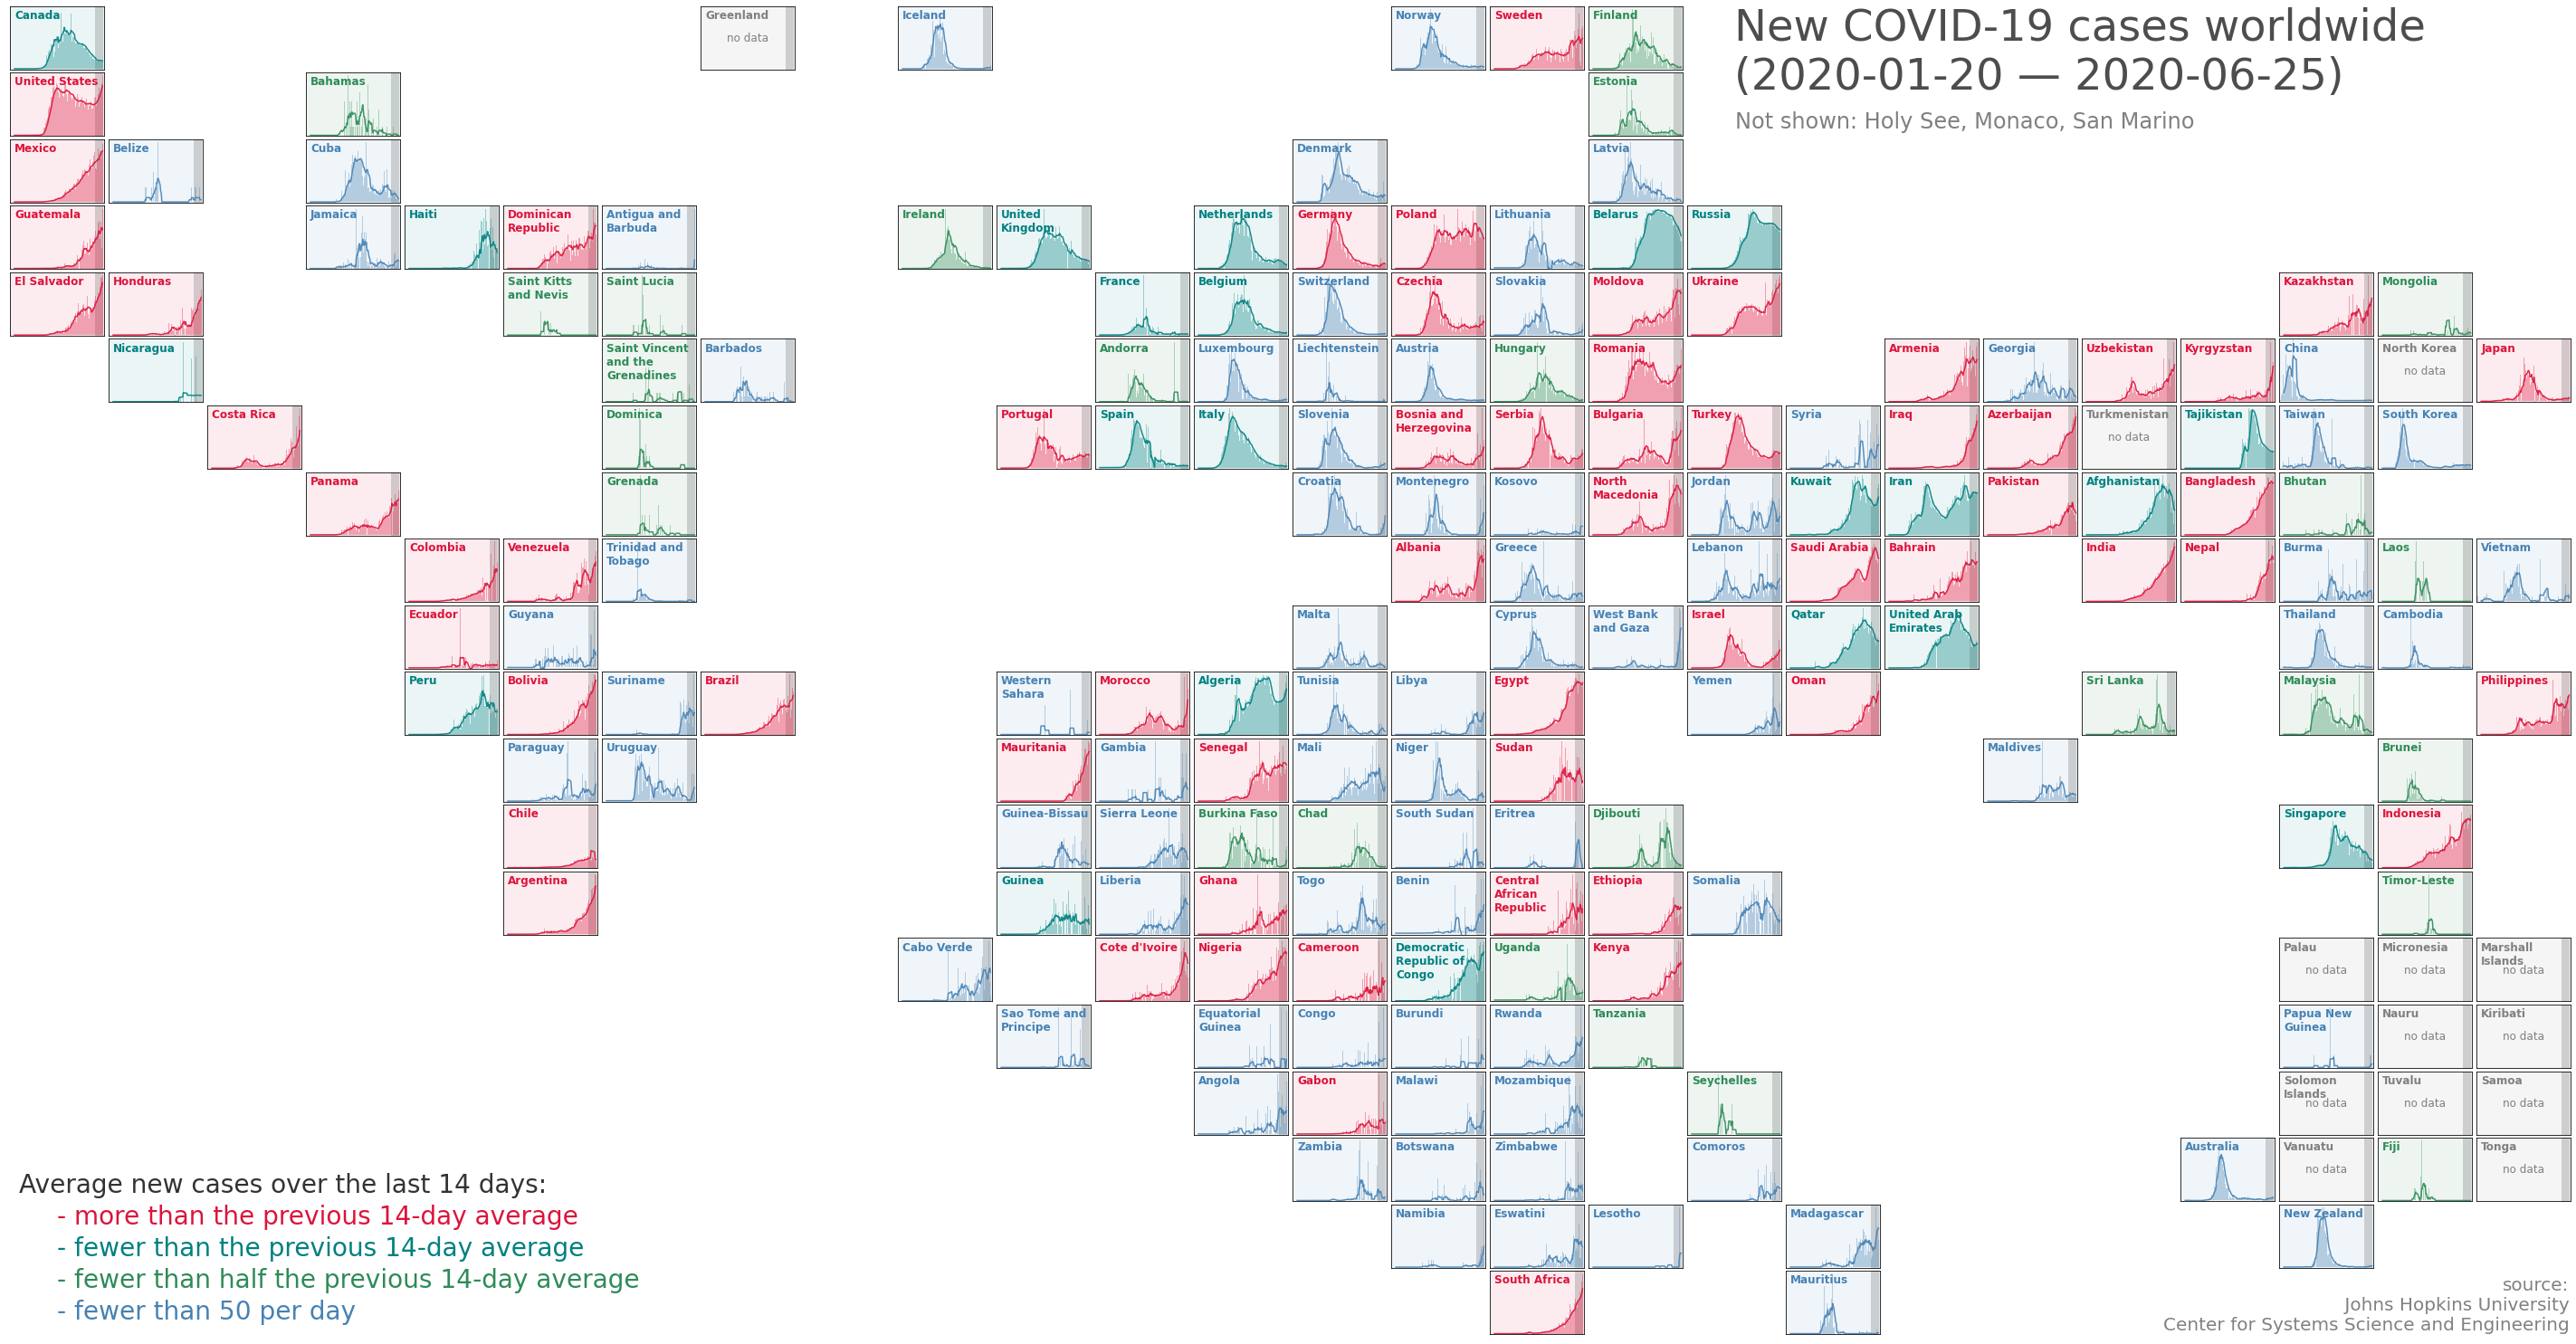

In [9]:
today = '2020-06-25'
days_since = 14
min_c = 50

w = 1.95
h = 1.35
ncols = 26
nrows = 20
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), sharex=True)
plt.subplots_adjust(wspace=0.05,hspace=0.05)

for co, po in country_pos.items():
    if co in countries:
        wdf_co = wdf.loc[wdf['country_name']==co]
        xvals_st = [co_date_dict[i] for i in sorted(wdf_co['date'].tolist())]
        yvals_st = wdf_co['total_cases'].diff().rolling(window=7).mean().tolist()
        
        if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= np.mean(yvals_st[(-days_since):]):
            col_co = 'teal'
        if np.mean(yvals_st[(-2*days_since):(-days_since)]) <= np.mean(yvals_st[(-days_since):]):
            col_co = 'crimson'
        if np.mean(yvals_st[(-days_since):])<min_c:
            col_co = 'steelblue'
        if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= 2*np.mean(yvals_st[(-days_since):]):
            col_co = 'seagreen'

        ax[po].plot(xvals_st, yvals_st, color=col_co, linewidth=1.5, alpha=0.9)
        ax[po].bar(xvals_st, wdf_co['total_cases'].diff(), color=col_co, alpha=0.35, width=1, linewidth=0.1)

    else:
        col_co = '.5'
        ax[po].text(0.5,0.5,'no data',fontsize='large',va='center',ha='center',
                color=col_co,transform=ax[po].transAxes)
        
    if len(co) > 13:
        colab = '\n'.join(co.split(' '))
        if colab == 'West\nBank\nand\nGaza':
            colab = 'West Bank\nand Gaza'
        if colab == 'Bosnia\nand\nHerzegovina':
            colab = 'Bosnia and\nHerzegovina'
        if colab == 'Antigua\nand\nBarbuda':
            colab = 'Antigua and\nBarbuda'
        if colab == 'Trinidad\nand\nTobago':
            colab = 'Trinidad and\nTobago'
        if colab == 'Saint\nKitts\nand\nNevis':
            colab = 'Saint Kitts\nand Nevis'
        if colab == 'Saint\nVincent\nand\nthe\nGrenadines':
            colab = 'Saint Vincent\nand the\nGrenadines'
        if colab == 'Sao\nTome\nand\nPrincipe':
            colab = 'Sao Tome and\nPrincipe'
        if colab == 'Democratic\nRepublic\nof\nCongo':
            colab = 'Democratic\nRepublic of\nCongo'
        if colab == 'United\nArab\nEmirates':
            colab = 'United Arab\nEmirates'
        if colab == 'Papua\nNew\nGuinea':
            colab = 'Papua New\nGuinea'

    else:
        colab = co

    ax[po].text(0.05,0.95,colab,fontsize='large',va='top',ha='left',
                color=col_co,fontweight='bold',transform=ax[po].transAxes)

    ylim_st = ax[po].get_ylim()
    xlim_st = ax[po].get_xlim()
    ydiff = ylim_st[1]-ylim_st[0]
    if co == 'China':
        ax[po].set_ylim(0-ydiff*0.01, ylim_st[1]*0.4)
        
    else:
        ax[po].set_ylim(0-ydiff*0.01, ylim_st[1])
    ax[po].set_xlim(-1,xvals_st[-1]+2)
    ax[po].fill_between([-1,xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color=col_co,alpha=0.08,zorder=0)
    ax[po].fill_between([xvals_st[-days_since],xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color='.2',alpha=0.2,zorder=0, linewidth=0)

for tup in tups:
    if tup not in country_pos.values():
        ax[tup].set_axis_off()
    else:
        ax[tup].set_xticks([])
        ax[tup].set_yticks([])

ax[tups[-1]].text(0.99,0.01,'source:\n Johns Hopkins University\nCenter for Systems Science and Engineering',
                color='.5',fontsize=20, va='bottom', ha='right', transform=ax[tups[-1]].transAxes)
ax[(0,17)].text(0.5,0.99,'New COVID-19 cases worldwide\n(2020-01-20 — %s)'%today,
                color='.3',fontsize=48, va='top', ha='left', transform=ax[(0,17)].transAxes)
ax[(1,17)].text(0.51,0.4,'Not shown: Holy See, Monaco, San Marino',
                color='.5',fontsize=24, va='top', ha='left', transform=ax[(1,17)].transAxes)


ax[(nrows-2,0)].text(0.1,1.3,'Average new cases over the last %i days:'%(days_since),
                color='.2',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.8,'- more than the previous %i-day average'%(days_since),
                color='crimson',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.3,'- fewer than the previous %i-day average'%(days_since),
                color='teal',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.2,'- fewer than half the previous %i-day average'%(days_since),
                color='seagreen',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.7,'- fewer than %i per day'%(min_c),
                color='steelblue',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)


plt.savefig('country_subplot_casecounts.png', dpi=425, bbox_inches='tight')

plt.show()

# Dark theme

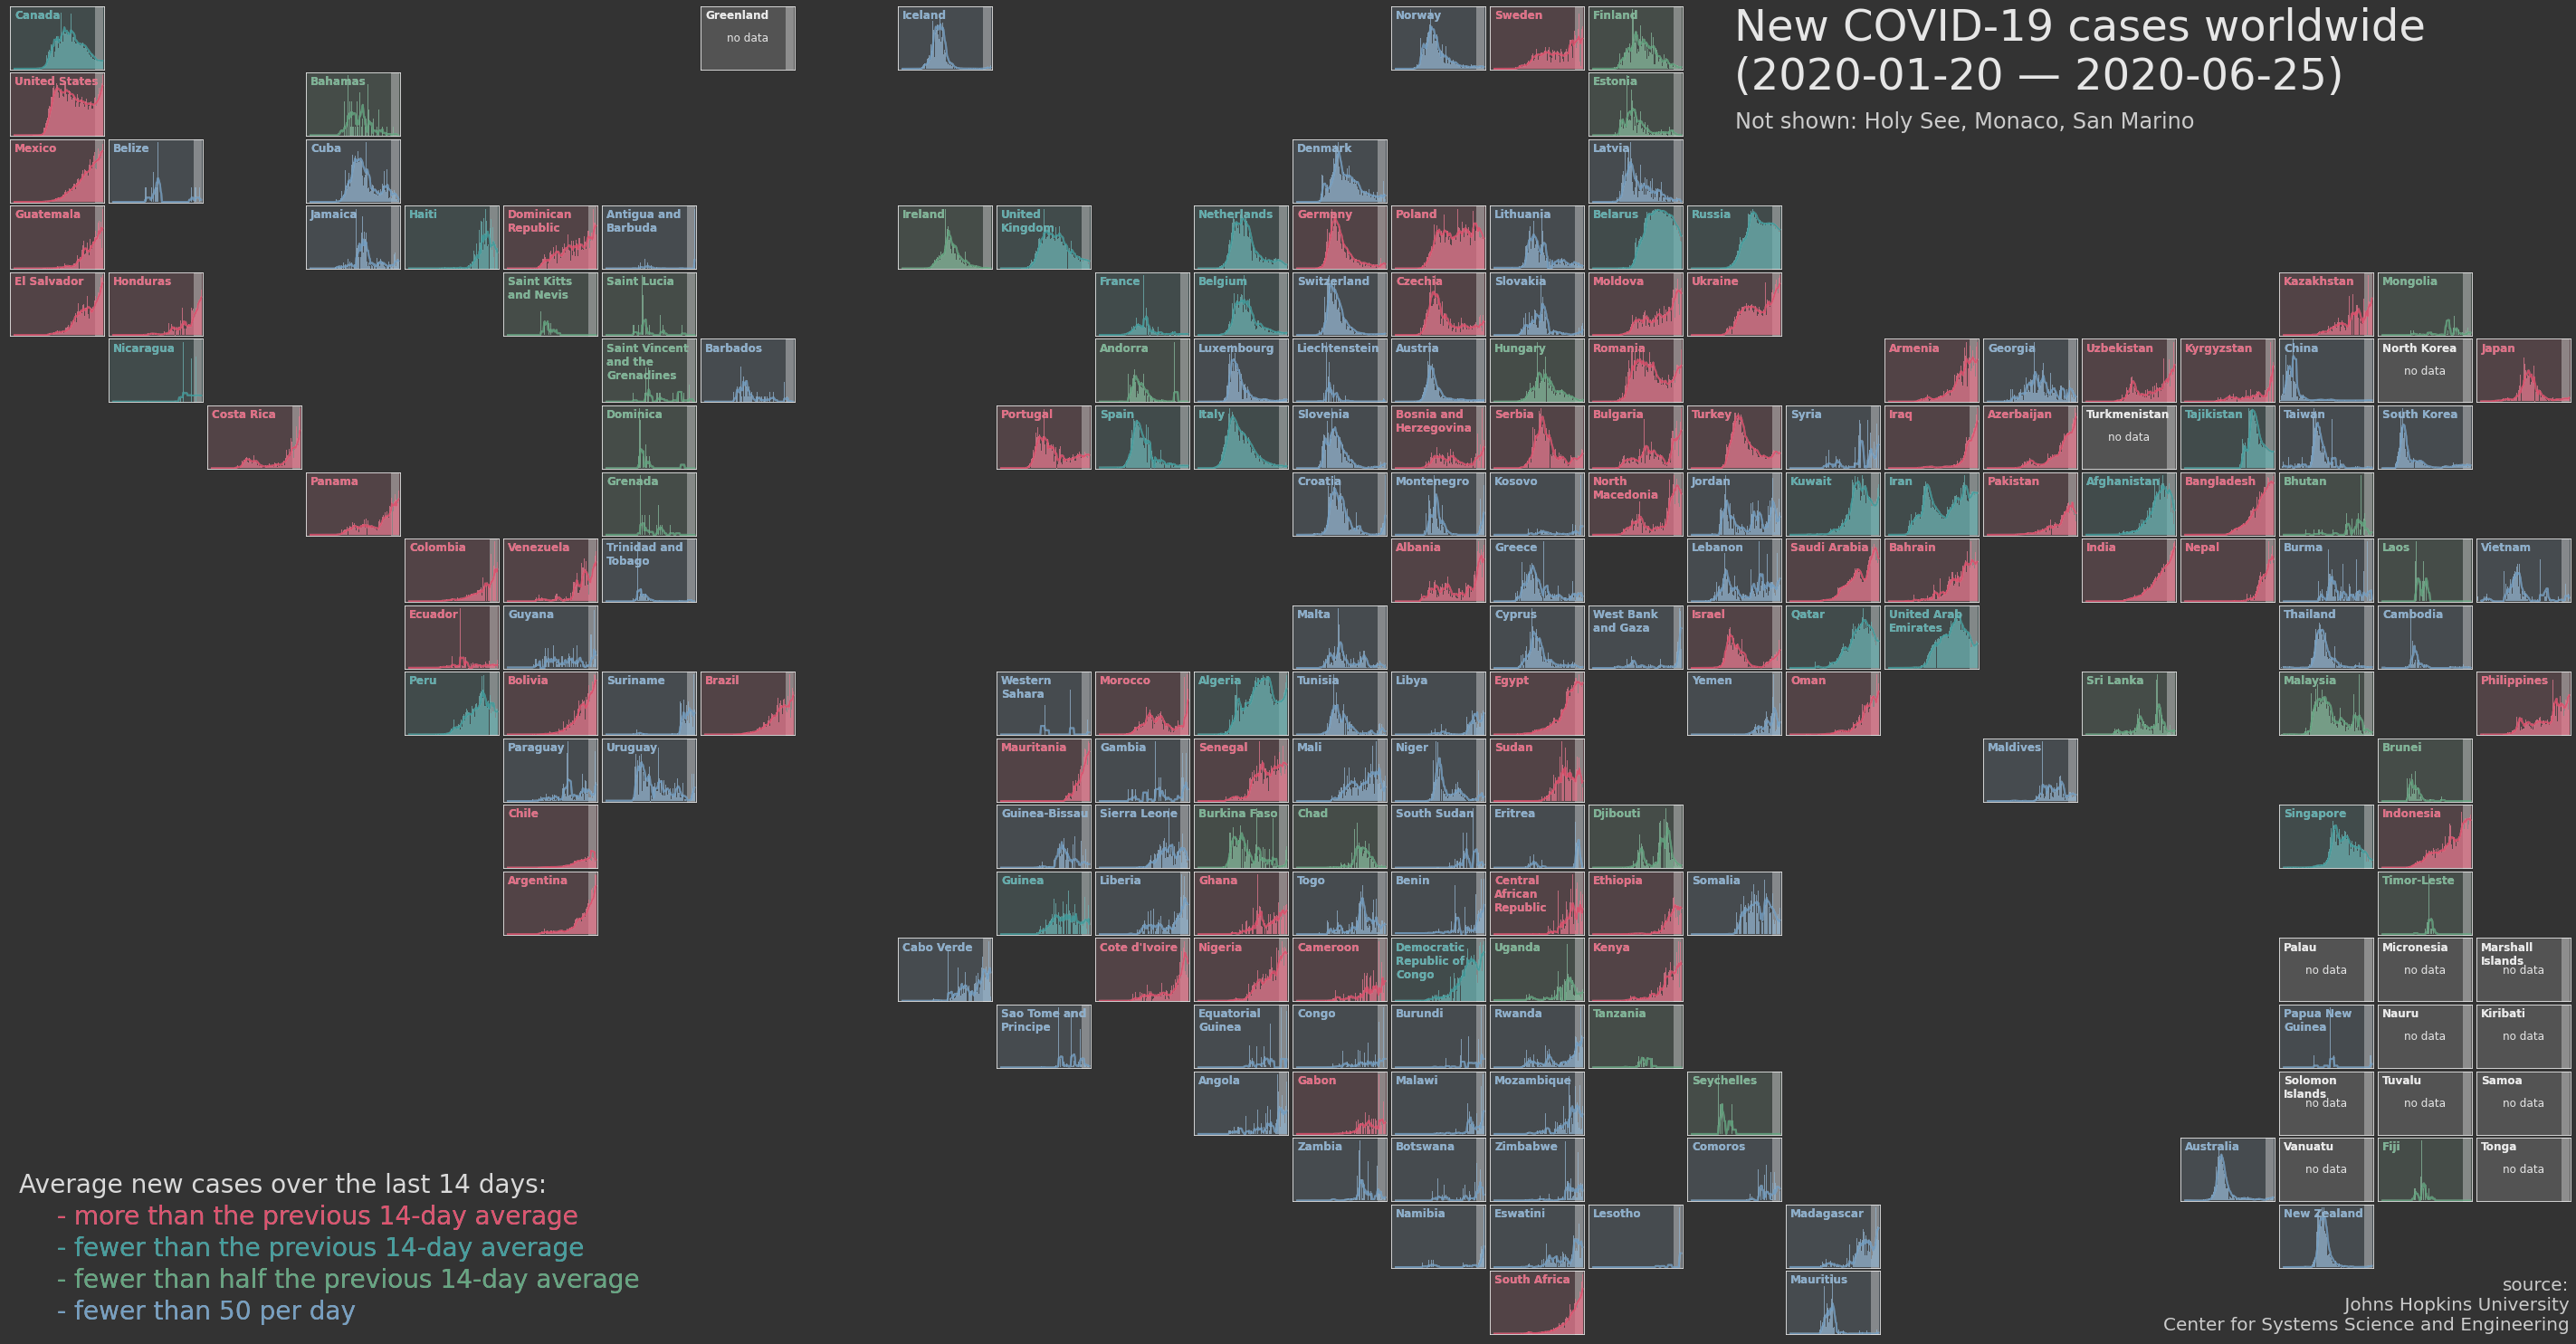

In [10]:
days_since = 14
min_c = 50

w = 1.95
h = 1.35
ncols = 26
nrows = 20
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*w,nrows*h), sharex=True, facecolor='.2')
plt.subplots_adjust(wspace=0.05,hspace=0.05)

for co, po in country_pos.items():
    if co in countries:
        wdf_co = wdf.loc[wdf['country_name']==co]
        xvals_st = [co_date_dict[i] for i in sorted(wdf_co['date'].tolist())]
        yvals_st = wdf_co['total_cases'].diff().rolling(window=7).mean().tolist()

        if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= np.mean(yvals_st[(-days_since):]):
            col_co = 'teal'
        if np.mean(yvals_st[(-2*days_since):(-days_since)]) <= np.mean(yvals_st[(-days_since):]):
            col_co = 'crimson'
        if np.mean(yvals_st[(-days_since):])<min_c:
            col_co = 'steelblue'
        if np.mean(yvals_st[(-2*days_since):(-days_since)]) >= 2*np.mean(yvals_st[(-days_since):]):
            col_co = 'seagreen'

        ax[po].plot(xvals_st, yvals_st, color='.9', linewidth=2, alpha=0.6)
        ax[po].plot(xvals_st, yvals_st, color=col_co, linewidth=2, alpha=0.6)

        ax[po].bar(xvals_st, wdf_co['total_cases'].diff(), color='.9', alpha=0.6, width=1, linewidth=0.1)
        ax[po].bar(xvals_st, wdf_co['total_cases'].diff(), color=col_co, alpha=0.4, width=1, linewidth=0.1)

    else:
        col_co = '.9'
        ax[po].text(0.5,0.5,'no data',fontsize='large',va='center',ha='center',
                color=col_co,transform=ax[po].transAxes)
        
    if len(co) > 13:
        colab = '\n'.join(co.split(' '))
        if colab == 'West\nBank\nand\nGaza':
            colab = 'West Bank\nand Gaza'
        if colab == 'Bosnia\nand\nHerzegovina':
            colab = 'Bosnia and\nHerzegovina'
        if colab == 'Antigua\nand\nBarbuda':
            colab = 'Antigua and\nBarbuda'
        if colab == 'Trinidad\nand\nTobago':
            colab = 'Trinidad and\nTobago'
        if colab == 'Saint\nKitts\nand\nNevis':
            colab = 'Saint Kitts\nand Nevis'
        if colab == 'Saint\nVincent\nand\nthe\nGrenadines':
            colab = 'Saint Vincent\nand the\nGrenadines'
        if colab == 'Sao\nTome\nand\nPrincipe':
            colab = 'Sao Tome and\nPrincipe'
        if colab == 'Democratic\nRepublic\nof\nCongo':
            colab = 'Democratic\nRepublic of\nCongo'
        if colab == 'United\nArab\nEmirates':
            colab = 'United Arab\nEmirates'
        if colab == 'Papua\nNew\nGuinea':
            colab = 'Papua New\nGuinea'

    else:
        colab = co

    ax[po].text(0.05,0.95,colab,fontsize='large',va='top',ha='left',
                color='.95',fontweight='bold',transform=ax[po].transAxes)
    ax[po].text(0.05,0.95,colab,fontsize='large',va='top',ha='left',alpha=0.6,
                color=col_co,fontweight='bold',transform=ax[po].transAxes)

    ylim_st = ax[po].get_ylim()
    xlim_st = ax[po].get_xlim()
    ydiff = ylim_st[1]-ylim_st[0]
    if co == 'China':
        ax[po].set_ylim(0-ydiff*0.01, ylim_st[1]*0.4)        
    else:
        ax[po].set_ylim(0-ydiff*0.01, ylim_st[1])

    ax[po].set_xlim(-1,xvals_st[-1]+2)
    ax[po].fill_between([-1,xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color=col_co,alpha=0.08,zorder=0)
    ax[po].fill_between([xvals_st[-days_since],xvals_st[-1]+1],0-ydiff*0.02,ylim_st[1]*1.3,
                        color='.9',alpha=0.4,zorder=0, linewidth=0)

for tup in tups:
    if tup not in country_pos.values():
        ax[tup].set_axis_off()
    else:
        ax[tup].set_xticks([])
        ax[tup].set_yticks([])
        ax[tup].patch.set_alpha(0.1)
        ax[tup].spines['bottom'].set_color('.95')
        ax[tup].spines['top'].set_color('.95')
        ax[tup].spines['right'].set_color('.95')
        ax[tup].spines['left'].set_color('.95')

ax[tups[-1]].text(0.99,0.01,'source:\n Johns Hopkins University\nCenter for Systems Science and Engineering',
                color='.8',fontsize=20, va='bottom', ha='right', transform=ax[tups[-1]].transAxes)
ax[(0,17)].text(0.5,0.99,'New COVID-19 cases worldwide\n(2020-01-20 — %s)'%today,
                color='.9',fontsize=48, va='top', ha='left', transform=ax[(0,17)].transAxes)
ax[(1,17)].text(0.51,0.4,'Not shown: Holy See, Monaco, San Marino',
                color='.8',fontsize=24, va='top', ha='left', transform=ax[(1,17)].transAxes)

ax[(nrows-2,0)].text(0.1,1.3,'Average new cases over the last %i days:'%(days_since),
                color='.85',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.8,'- more than the previous %i-day average'%(days_since),
                color='.9',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.3,'- fewer than the previous %i-day average'%(days_since),
                color='.9',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.2,'- fewer than half the previous %i-day average'%(days_since),
                color='.9',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.7,'- fewer than %i per day'%(min_c),
                color='.9',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.8,'- more than the previous %i-day average'%(days_since),alpha=0.7,
                color='crimson',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,0.3,'- fewer than the previous %i-day average'%(days_since),alpha=0.7,
                color='teal',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.2,'- fewer than half the previous %i-day average'%(days_since),alpha=0.7,
                color='seagreen',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)
ax[(nrows-2,0)].text(0.5,-.7,'- fewer than %i per day'%(min_c),alpha=0.7,
                color='steelblue',fontsize=28, va='center', ha='left', transform=ax[(nrows-2,0)].transAxes)


plt.savefig('country_subplot_casecounts_dark.png', dpi=425, bbox_inches='tight', facecolor='.2')

plt.show()